# US Congress Tweet Analysis

Here 1000 latest tweets from members of US Senate and House of Representatives are analysed. Tweets are loaded using this Python script: https://github.com/Jefferson-Henrique/GetOldTweets-python

I have also added to the data the State, Party and Real Name of each member of congress using these Twitter handle lists
https://gwu-libraries.github.io/sfm-ui/posts/2017-05-23-congress-seed-list

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_senate=pd.read_csv('senate_tweets.csv')
df_house=pd.read_csv('house_tweets.csv')
df_senate.sample(5)

/Users/erno/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,username,date,retweets,favorites,text,mentions,hashtags,State,Party,Real Name,Profile URL,Biography,Verified
3781,ChrisVanHollen,2017-06-06 00:03,50,93,Trump’s cuts to the @StateDept will undermine ...,@StateDept @SenDanSullivan,NaN,Maryland,Democratic,Chris Van Hollen,http://twitter.com/ChrisVanHollen,"U.S. Senator, Maryland",Yes
14390,MikeCrapo,2017-01-10 16:35,0,2,"Wishing you a happy birthday, @ChrisVanHollen ...",@ChrisVanHollen @RoyBlunt,NaN,Idaho,Republican,Mike Crapo,http://twitter.com/MikeCrapo,United States Senator for the great state of I...,Yes
72248,SenatorEnzi,2017-06-22 00:28,5,10,Pleased to present the Congressional Gold Meda...,NaN,NaN,Wyoming,Republican,Mike Enzi,http://twitter.com/SenatorEnzi,Mike Enzi is Wyomingâ€™s 20th U.S. Senator. Hi...,Yes
19252,SenAlexander,2017-09-07 16:10,5,11,Yesterday – We had a focused hearing on the in...,NaN,NaN,Tennessee,Republican,Lamar Alexander,http://twitter.com/SenAlexander,"Follow Sen. Alexander in TN, in DC, and in the...",Yes
77856,SenatorLankford,2017-01-19 22:27,15,54,Had a good convo w/ #RexTillerson about foreig...,NaN,#RexTillerson #religiousfreedom,Oklahoma,Republican,James Lankford,http://twitter.com/SenatorLankford,Serving the State of Oklahoma in the United St...,Yes


Data includes tweets, mentions of other twitter users, and hashtags.

In [3]:
df_house.sample(50)

,username,date,retweets,favorites,text,mentions,hashtags,Member,Party,District
350807,USRepRickNolan,2017-04-22 22:34,14,39,Happy Earth Day! Matt's sign @Brainerd #MarchF...,@Brainerd,#MarchForScience,"Nolan, Rick",Democratic,MN-8
343750,TomRooney,2014-05-30 19:45,0,0,@marclaw69 On it: http:// rooney.house.gov/pre...,@marclaw69,NaN,"Rooney, Tom",Republican,FL-17
98271,RepCharlieCrist,2017-09-14 17:07,3,1,Helpful overview of @fema assistance Pinellas ...,@fema @TB_Times @MiamiHerald,NaN,"Crist, Charlie",Republican,FL-13
150397,RepGeneGreen,2017-06-26 22:36,1,3,. @SenateGOP is going to leave millions Americ...,@SenateGOP,#Trumpcare,"Green, Gene",Democratic,TX-29
292924,RepStephMurphy,2017-12-11 18:42,3,31,Sending my thoughts to victims of the apparent...,NaN,NaN,"Murphy, Stephanie",Republican,FL-7
254705,RepPeteAguilar,2015-07-23 20:31,4,0,Time to get the #InlandEmpire economy back on ...,NaN,#InlandEmpire,"Aguilar, Pete",Democratic,CA-31
48351,MarshaBlackburn,2017-02-08 21:00,3,11,Sat down w/ @repgregwalden this morning to dis...,@repgregwalden @HouseCommerce,#SubCommTech #,"Blackburn, Marsha",Republican,TN-7
237565,RepMcSally,2017-02-17 18:28,11,13,Read a wrap-up of our @househomeland hearing l...,@househomeland,NaN,"McSally, Martha",Republican,AZ-2
346814,USRepKCastor,2017-10-06 01:05,4,3,@hccptaptsa @alonsohigh @theblakesga @MightyCh...,@hccptaptsa @alonsohigh @theblakesga @MightyCh...,NaN,"Castor, Kathy",Democratic,FL-14
9820,CongBoyle,2017-05-25 19:00,11,10,“Trump budget would increase homelessness and ...,@CenterOnBudget,NaN,"Boyle, Brendan",Democratic,PA-13


In [4]:
print(df_senate.info())
print(df_house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98102 entries, 0 to 98101
Data columns (total 13 columns):
username       98102 non-null object
date           98102 non-null object
retweets       98102 non-null int64
favorites      98102 non-null int64
text           98099 non-null object
mentions       34101 non-null object
hashtags       41094 non-null object
State          98102 non-null object
Party          98102 non-null object
Real Name      98102 non-null object
Profile URL    98102 non-null object
Biography      96102 non-null object
Verified       98102 non-null object
dtypes: int64(2), object(11)
memory usage: 9.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389483 entries, 0 to 389482
Data columns (total 10 columns):
username     389479 non-null object
date         389479 non-null object
retweets     389479 non-null object
favorites    389479 non-null object
text         389450 non-null object
mentions     140189 non-null object
hashtags     193874 non-null 

In [5]:
#Tweets by party from senate members
df_senate['Party'].value_counts()

Republican     50392
Democratic     45710
Independent     2000
Name: Party, dtype: int64

In [6]:
#Tweets by party from house members
df_house['Party'].value_counts()

Republican    203119
Democratic    174259
Name: Party, dtype: int64

In [7]:
#Null values
print("Senate data columns with null values:\n", df_senate.isnull().sum())
print("House data columns with null values:\n", df_house.isnull().sum())

Senate data columns with null values:
 username           0
date               0
retweets           0
favorites          0
text               3
mentions       64001
hashtags       57008
State              0
Party              0
Real Name          0
Profile URL        0
Biography       2000
Verified           0
dtype: int64
House data columns with null values:
 username          4
date              4
retweets          4
favorites         4
text             33
mentions     249294
hashtags     195609
Member        12105
Party         12105
District      12105
dtype: int64


In [8]:
#There is so much data from the House so I just delete the tweets in which Name of the member is missing
df_house=df_house.drop(df_house[df_house['Member'].isnull()].index,axis=0)
df_house=df_house.drop(df_house[df_house['username'].isnull()].index,axis=0)

In [9]:
#Correct the datatypes of retweets and likes
df_house['retweets']=df_house['retweets'].astype(int)
df_house['favorites']=df_house['favorites'].astype(int)

In [10]:
#Number of retweets
senate_retweets=df_senate.groupby(by='Real Name')['retweets'].sum()
print(senate_retweets.sort_values(ascending=False)[:20])

Real Name
Bernie Sanders        6317648
Elizabeth Warren      3026413
Kamala Harris         2758298
Chris Murphy          1846827
Chuck Schumer         1270456
Dianne Feinstein      1246854
John McCain           1227293
Kirsten Gillibrand    1138818
Rand Paul             1117759
Tim Kaine              916062
Marco Rubio            680956
Cory Booker            536741
Dick Durbin            497960
Bob Casey              438116
Ron Wyden              427996
Jeff Merkley           409343
Mark Warner            407593
Jeff Flake             393345
Claire McCaskill       351826
Bob Corker             307091
Name: retweets, dtype: int64


In [11]:
#Number of likes by senators
senate_favorites=df_senate.groupby(by='Real Name')['favorites'].sum()
print(senate_favorites.sort_values(ascending=False)[:20])

Real Name
Bernie Sanders        17175073
Elizabeth Warren       8817509
Kamala Harris          6468259
John McCain            4537243
Chris Murphy           4441973
Kirsten Gillibrand     3414675
Chuck Schumer          3200305
Rand Paul              2932251
Tim Kaine              2402297
Dianne Feinstein       2351641
Marco Rubio            1974498
Cory Booker            1853190
Jeff Flake             1406864
Claire McCaskill        929410
Bob Corker              922326
Mark Warner             874329
Ron Wyden               823118
Bob Casey               789428
Jeff Merkley            782393
Tammy Duckworth         754440
Name: favorites, dtype: int64


Based on this Democratic Senators are much more popular in Twitter than Republicans. Bernie Sanders is by far the most popular senator. From Republicans John McCain and Rand Paul are the most retweeted senators.

In [12]:
df_senate[df_senate['Real Name']=='Bernie Sanders'].tail(1)

,username,date,retweets,favorites,text,mentions,hashtags,State,Party,Real Name,Profile URL,Biography,Verified
50224,SenSanders,2017-04-06 17:21,6121,16244,I oppose the nomination of Neil Gorsuch. I can...,NaN,NaN,Vermont,Independent,Bernie Sanders,http://twitter.com/SenSanders,Sen. Bernie Sanders is the longest serving ind...,Yes


The Olders tweet from Bernie Sanders in this data is from April 2017 so the tweets are not from time when he was a presidential candidate.

In [13]:
#Most popular House members by retweets
#Number of retweets
house_retweets=df_house.groupby(by='Member')['retweets'].sum()
print(house_retweets.sort_values(ascending=False)[:20])

Member
Schiff, Adam              5199642
Lewis, John               1932346
Kennedy III, Joseph P.    1180991
Swalwell, Eric            1156709
Pelosi, Nancy             1036509
Lee, Barbara               619569
Castro, Joaquin            349892
Ryan, Paul D.              325987
Takano, Mark               316954
Gowdy, Trey                314114
Chaffetz, Jason            296454
Scalise, Steve             259882
Ellison, Keith             254088
Lieu, Ted                  231854
Beyer, Don                 198208
Pocan, Mark                182823
Wilson, Frederica          162901
Cummings, Elijah           152060
Bridenstine, Jim           140070
King, Steve                135528
Name: retweets, dtype: int64


In [14]:
#Most popular House members by likes
house_favorites=df_house.groupby(by='Member')['favorites'].sum()
print(house_favorites.sort_values(ascending=False)[:20])

Member
Schiff, Adam              12038592
Lewis, John                4174930
Swalwell, Eric             2640546
Pelosi, Nancy              2538693
Kennedy III, Joseph P.     2409450
Ryan, Paul D.              1286817
Lee, Barbara               1192078
Gowdy, Trey                 925129
Scalise, Steve              875624
Chaffetz, Jason             781151
Castro, Joaquin             696691
Ellison, Keith              661727
Takano, Mark                585999
Lieu, Ted                   473951
Wilson, Frederica           455884
Beyer, Don                  363869
Cummings, Elijah            350334
McCarthy, Kevin             304564
Pocan, Mark                 294996
Speier, Jackie              253609
Name: favorites, dtype: int64


Adam Schiff is by far the most popular House member in Twitter. One possibility for his popularity is that he has been active commenting the Trump-Russia investigation.

Lets next check what are the most common hashtags and mentions for senators

In [15]:
#Lets create new dataframes for this
df_hashtags=df_senate[['Real Name','Party','hashtags']]
df_hashtags=df_hashtags.dropna()
df_mentions=df_senate[['username','Real Name','Party','mentions']]
df_mentions=df_mentions.dropna()
mentions=df_mentions.groupby(by=['Real Name','mentions']).count()
hashtags=df_hashtags.groupby(by=['Real Name','hashtags']).count()

In [16]:
print(mentions.sort_values(by='username',ascending=False)[0:40])

                                   username  Party
Real Name        mentions                         
Elizabeth Warren @realDonaldTrump       104    104
Bob Casey        @SenateGOP             104    104
Ron Johnson      @SenRonJohnson         103    103
Mitch McConnell  @POTUS                  99     99
Ben Cardin       @POTUS                  91     91
Michael Bennet   @POTUS                  85     85
Tom Udall        @POTUS                  78     78
Ben Cardin       @SenateGOP              74     74
Elizabeth Warren @SenateGOP              67     67
John McCain      @WSJ                    65     65
Jim Inhofe       @EPWMaj                 61     61
John Cornyn      @dcexaminer             56     56
Chuck Schumer    @POTUS                  55     55
Cortez Masto     @realDonaldTrump        54     54
Tom Cotton       @newsradio1029          50     50
Jeff Merkley     @realDonaldTrump        50     50
Dick Durbin      @POTUS                  45     45
Mazie Hirono     @realDonaldTru

Here it seems to be common that Democrats use Donald Trumps personal account in tweets and Republicans use the official POTUS twitter account.<br>
Senate Committee on Environment and Public Works seems the be the most common committee in senate to tweet about as @EPWMaj, and @EPA are in the most mentioned usernames by the ranking members of that committee.

In [17]:
print(hashtags.sort_values(by='Party',ascending=False)[0:40])

                                        Party
Real Name            hashtags                
Orrin Hatch          #utpol               417
Susan Collins        #mepolitics          323
Joe Manchin          #WV                  297
Jon Tester           #mtpol               243
Dean Heller          #NV                  228
Joni Ernst           #99CountyTour        182
Richard Shelby       #AL                  179
Angus King           #mepolitics          139
Dan Sullivan         #Alaska              134
Mike Lee             #utpol               126
David Perdue         #gapol               124
Mitch McConnell      #Senate              115
Mike Crapo           #idpol               112
Mitch McConnell      #TaxReform            87
Ron Johnson          #HSGAC                86
Shelley Moore Capito #taxreform            83
Ron Wyden            #GOPTaxPlan           74
Dick Durbin          #DreamAct             72
John Boozman         #Arkansas             72
Ron Wyden            #Trumpcare   

In hashtags it is not surprising that most common hashtags are hashtags for senators own states. Also we can see that Republican talk about taxreform, and obamacare whereas Democrats use words TrumpTax and Trumpcare.

Lets then try to guess the party of senator from the tweets using TfidfVectorizer and Multinomial Naive Bayes classifier using the house tweets as a training set.

TfidfVectorizer creates matrix of TF-IDF(term frequency–inverse document frequency) features. TF-IDF reflects how important a word is to the document. It is combination of term frequency and inverse document frequency. Term frequency is just how often a word appears in the document. Inverse document frequency is calculated by dividing the total number of documents by the number of documents containing the word, and then taking the logarithm of that number.

In [18]:
#Change Angus King and Bernie Sanders from independent to Democratic
df_senate['Party'][df_senate.Party=='Independent']='Democratic'
#Lets drop unnecessary columns
df_house=df_house.drop(['mentions','hashtags'],axis=1)
df_senate=df_senate.drop(['mentions','hashtags','Biography'],axis=1)
df_house=df_house.dropna()
df_senate=df_senate.dropna()

/Users/erno/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import time

In [20]:
#Lets remove the common english stopwords, names of states and some common tweet words that are from links for example.
from stop_words import get_stop_words
states=list(df_senate['State'].unique())
common_stop_words = get_stop_words('english')
tweet_stop_words=['com','http','twitter','pic','www','https','bit','ly','today','thank','gov','goo','gl']
joined_list=common_stop_words+tweet_stop_words + states
vect = TfidfVectorizer(stop_words=joined_list)

x_train=vect.fit_transform(df_house['text'])
x_test=vect.transform(df_senate['text'])
x_train

<377349x411105 sparse matrix of type '<class 'numpy.float64'>'
	with 5005708 stored elements in Compressed Sparse Row format>

In [21]:
#Convert Parties to numbers
le=LabelEncoder()
y_train=le.fit_transform(df_house['Party'])
y_test=le.transform(df_senate['Party'])

In [22]:
start = time.time()
clf = MultinomialNB().fit(x_train, y_train)
pred = clf.predict(x_test)
df_senate['Predicted Party']=le.inverse_transform(pred)
print(time.time() - start)

0.24219989776611328


In [23]:
from sklearn.metrics import accuracy_score,zero_one_loss
accuracy_score(y_test, pred)

0.77371838652789526

Accuracy looks quite high.

In [24]:
#Lets create a new dataframe for plotting the classification
senator_misclassifications=df_senate[df_senate.Party !=df_senate['Predicted Party']]['Real Name'].value_counts()/df_senate['Real Name'].value_counts()
clas=senator_misclassifications.to_frame(name='Misclassifications')
names=df_senate.drop_duplicates(subset='Real Name')[['Real Name','Party','State']]
senator_classification = pd.merge(clas,names, left_index = True, right_on='Real Name')

In [25]:
#Average misclassification rate by party
misclas=senator_classification.groupby(by='Party')['Misclassifications'].mean()
print(misclas.sort_values(ascending=False))

Party
Democratic    0.286450
Republican    0.169611
Name: Misclassifications, dtype: float64


In [26]:
#How many tweets by member were misclassified
senator_classification.sort_values(by=['Misclassifications'],ascending=False)[0:20]  

,Misclassifications,Real Name,Party,State
63010,0.90200,Joe Manchin,Democratic,West Virginia
31710,0.73600,Joe Donnelly,Democratic,Indianna
22000,0.63662,Bill Nelson,Democratic,Florida
20000,0.63400,Angus King,Democratic,Maine
75010,0.63200,Heidi Heitkamp,Democratic,North Dakota
83102,0.59800,Jon Tester,Democratic,Montana
90102,0.54100,Claire McCaskill,Democratic,Missouri
34710,0.50700,Gary Peters,Democratic,Michigan
54010,0.49700,Debbie Stabenow,Democratic,Michigan
89102,0.44300,Amy Klobuchar,Democratic,Minnesota


Mosty misclassified members are all Democrats from red or purple states. If we look to which party each senator is more often classified then only 8 Democrats from all 100 members of senate were misclassified to the wrong party.


In [27]:
#How many tweets by member were misclassified
senator_classification.sort_values(by=['Misclassifications'],ascending=True)[0:20] 

,Misclassifications,Real Name,Party,State
80681,0.061000,Mike Rounds,Republican,South Dakota
39710,0.065000,John Hoeven,Republican,North Dakota
80010,0.067064,Jim Risch,Republican,Idaho
82681,0.073634,Luther Strange,Republican,Alabama
52010,0.077000,Richard Shelby,Republican,Alabama
9000,0.078000,John Boozman,Republican,Arkansas
15000,0.079000,Patty Murray,Democratic,Washington
43225,0.080000,Joni Ernst,Republican,Iowa
26710,0.081000,Shelley Moore Capito,Republican,West Virginia
47225,0.081000,Pat Roberts,Republican,Kansas


On the other side are most often correctly classified are Republicans from red states.
Classifier seems to work very well. But for example West Virginia has lots of GOP members in House so if members from West Virginia talk lot about West Virginia with some other word to "West Virginia" which was removed in stop words it might use this to classify Joe Manchins tweets to GOP tweets and same for other Red State democrats.

Also better way to do this might be to combine all the tweets from one member to one block of text and try to just classify that one.

Finally lets make Wordcloud to see what Democrats and Republicans in the Senate are talking about.

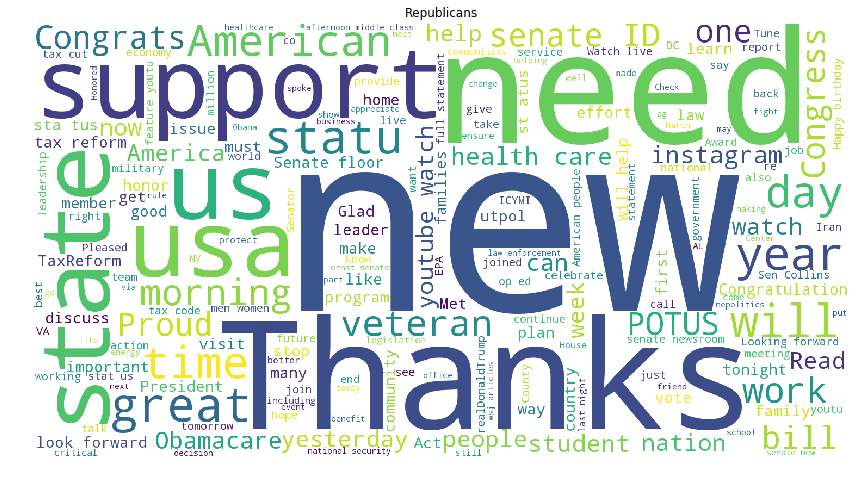

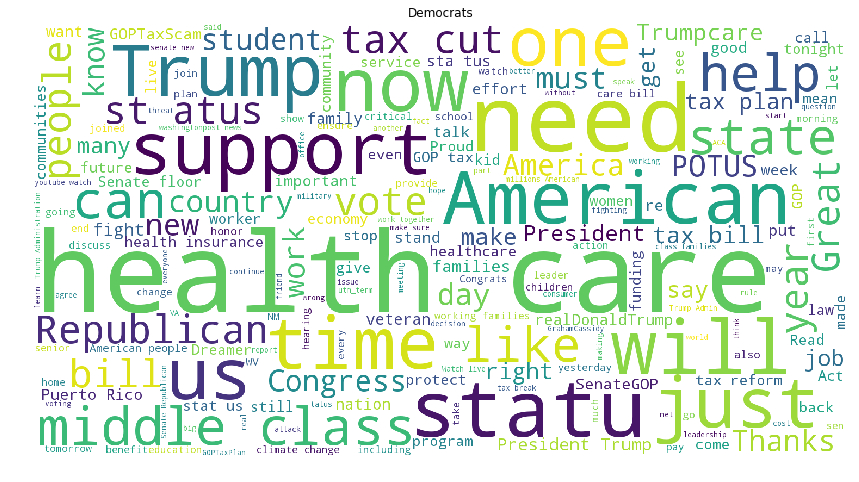

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# join tweets to a single string
gop_words = ' '.join(df_senate[df_senate['Party']=='Republican']['text'])
dem_words = ' '.join(df_senate[df_senate['Party']=='Democratic']['text'])
extra_stopwords=['public','index','press','release','releases','fm','html']
stop_words=joined_list+extra_stopwords
# remove URLs, RTs, and twitter handles
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=1500,
                      height=800
                     ).generate(gop_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Republicans')
plt.show()
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=1500,
                      height=800
                     ).generate(dem_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Democrats')
plt.show()

On Republicans work cloud 'Veteran' seems to be most common political topic word, behind that come Obamacare and TaxReform. Otherwise the biggest words are not about any subject.

Democrats seem to use Twitter more to talk about health care, middle class, students, and especially about Trump and Republicans. 